In [ ]:
# This part for connect drive.
# If yours working local pc then skip this part
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/yapay_zeka_video/S-002-Stroke-Prediction')
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense,InputLayer

In [2]:
# dataset from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
# upload dataset
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
# drop the id. Because we not need.
data.drop(['id'],axis=1,inplace=True)
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# show features of dataset
print("\n<======= Info =======>\n")
print(data.info())
print("\n<======= NA size =======>\n")
print(data.isna().sum())


<======= Info =======>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None

<======= NA size =======>

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type             

In [4]:
data.groupby(['stroke']).size()

stroke
0    4861
1     249
dtype: int64

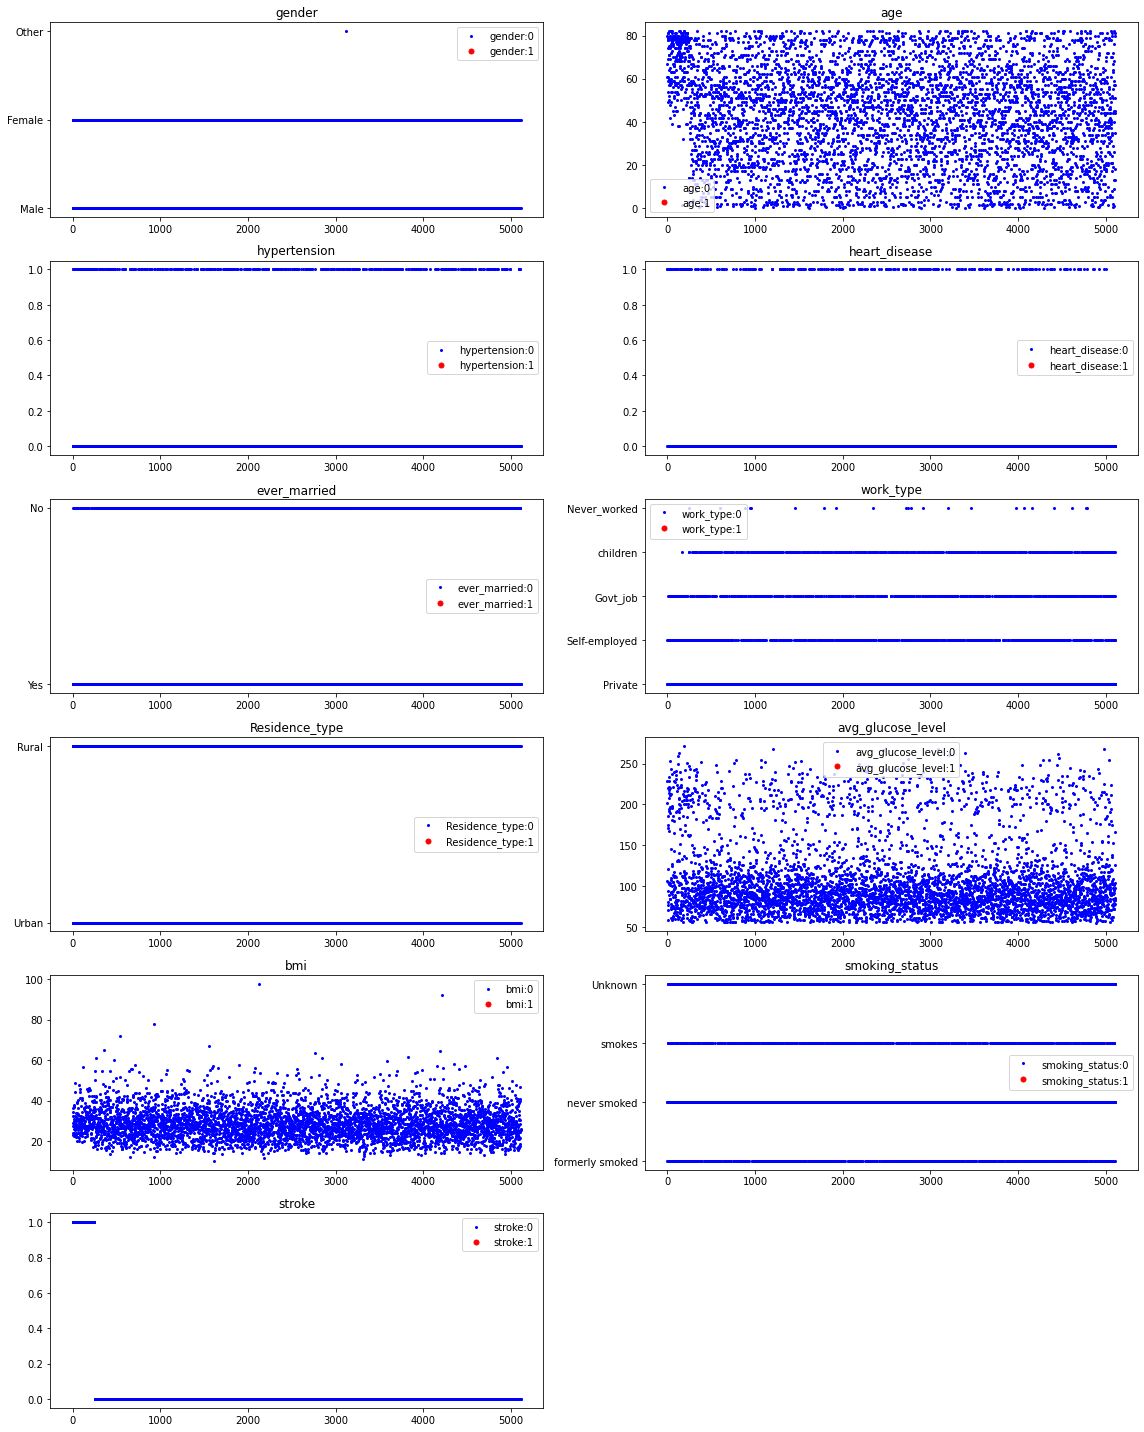

In [5]:
def splitClass(colm_id):
  c0,c1=[],[]
  for x in range(len(data)):
    if data['stroke'][x]==0:
      c0.append(data.iloc[x][colm_id])
    else:
      c0.append(data.iloc[x][colm_id])
  
  return c0,c1

class_1,class_2=[],[]

plt.figure(figsize=(16,20))

for x in range(len(data.columns)):
  class_0,class_1=splitClass(x)
  plt.subplot(6,2,x+1)
  plt.plot(class_0,'bo',markersize=2)
  plt.plot(class_1,'ro',markersize=5)
  plt.legend([data.columns[x]+':0',data.columns[x]+':1'])
  plt.title(data.columns[x])

plt.tight_layout()
plt.show()

In [6]:
# delete corrupted data and reset the index
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print("\n<======= Info =======>\n")
print(data.info())
print("\n<======= NA size =======>\n")
print(data.isna().sum())


<======= Info =======>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 422.0+ KB
None

<======= NA size =======>

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence

In [7]:
# get uniqe values in the string data 
# gender - ever_married - work_type - Residence_type - smoking_status
print("gender         :",data['gender'].unique())
print("ever_married   :",data['ever_married'].unique())
print("work_type      :",data['work_type'].unique())
print("Residence_type :",data['Residence_type'].unique())
print("smoking_status :",data['smoking_status'].unique())

gender         : ['Male' 'Female' 'Other']
ever_married   : ['Yes' 'No']
work_type      : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
# turn strings to numbers and save the labels
gender_le=LabelEncoder().fit(data['gender'])
data['gender']=gender_le.transform(data['gender'])

ever_married_le=LabelEncoder().fit(data['ever_married'])
data['ever_married']=ever_married_le.transform(data['ever_married'])

work_type_le=LabelEncoder().fit(data['work_type'])
data['work_type']=work_type_le.transform(data['work_type'])

Residence_type_le=LabelEncoder().fit(data['Residence_type'])
data['Residence_type']=Residence_type_le.transform(data['Residence_type'])

smoking_status_le=LabelEncoder().fit(data['smoking_status'])
data['smoking_status']=smoking_status_le.transform(data['smoking_status'])

data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1
5,1,74.0,1,1,1,2,0,70.09,27.4,2,1
6,0,69.0,0,0,0,2,1,94.39,22.8,2,1
7,0,78.0,0,0,1,2,1,58.57,24.2,0,1
8,0,81.0,1,0,1,2,0,80.43,29.7,2,1
9,0,61.0,0,1,1,0,0,120.46,36.8,3,1


In [9]:
# normalization
normalizer=MinMaxScaler().fit(data)
data=normalizer.transform(data)

print(data)

[[0.5        0.81689453 0.         ... 0.30126002 0.33333333 1.        ]
 [0.5        0.97558594 0.         ... 0.25429553 0.66666667 1.        ]
 [0.         0.59716797 0.         ... 0.27605956 1.         1.        ]
 ...
 [0.         0.42626953 0.         ... 0.2325315  0.66666667 0.        ]
 [0.5        0.62158203 0.         ... 0.17525773 0.33333333 0.        ]
 [0.         0.53613281 0.         ... 0.18213058 0.         0.        ]]


In [10]:
# split the data
# just last value is output. 
input_size=10
x_data=data[:,:input_size]
y_data=data[:,input_size:]

print("\n<===== all input and output data shape =====>\n")
print("x_data : ",x_data.shape)
print("y_data : ",y_data.shape)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
# no need this variables enymore
del x_data,y_data,data

print("\n<===== Trian and test data shape =====>\n")
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


<===== all input and output data shape =====>

x_data :  (4909, 10)
y_data :  (4909, 1)

<===== Trian and test data shape =====>

x_train :  (3289, 10)
y_train :  (3289, 1)
x_test  :  (1620, 10)
y_test  :  (1620, 1)


In [11]:
# create model
dropout=0.2

model=tf.keras.models.Sequential()
model.add(InputLayer(input_shape=(input_size,)))
model.add(Dropout(dropout))
model.add(Dense(10,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(10,activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1,activation='sigmoid'))

# binary(0,1) classification

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable pa

Epoch 1/25
103/103 [==============================] - 2s 5ms/step - loss: 0.4357 - accuracy: 0.9295 - val_loss: 0.2688 - val_accuracy: 0.9506
Epoch 2/25
103/103 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.9608 - val_loss: 0.2219 - val_accuracy: 0.9506
Epoch 3/25
103/103 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9608 - val_loss: 0.2108 - val_accuracy: 0.9506
Epoch 4/25
103/103 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9608 - val_loss: 0.1987 - val_accuracy: 0.9506
Epoch 5/25
103/103 [==============================] - 0s 3ms/step - loss: 0.1996 - accuracy: 0.9608 - val_loss: 0.1923 - val_accuracy: 0.9506
Epoch 6/25
103/103 [==============================] - 0s 3ms/step - loss: 0.1959 - accuracy: 0.9608 - val_loss: 0.1854 - val_accuracy: 0.9506
Epoch 7/25
103/103 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9608 - val_loss: 0.1825 - val_accuracy: 0.9506
Epoch 

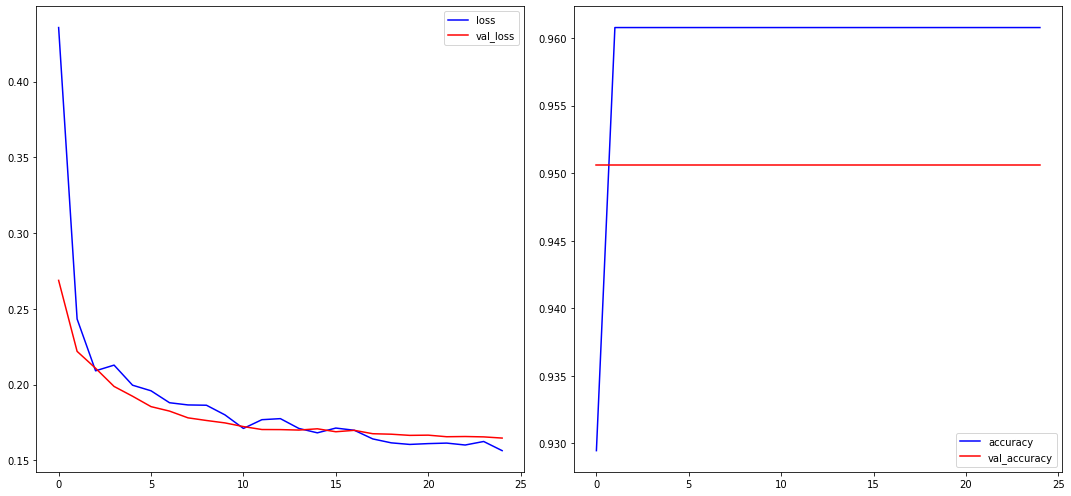

In [12]:
history=model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test,y_test))

# visuelize result
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.legend(['accuracy','val_accuracy'])

plt.tight_layout()
plt.show()

In [13]:
# evaluate model
train_eval=model.evaluate(x_train,y_train,verbose=0)
print("\n<====== Train data======>\n")
print("Loss     : ",round(train_eval[0],ndigits=3))
print("Accuracy : %",round(train_eval[1],ndigits=3)*100)

test_eval=model.evaluate(x_test,y_test,verbose=0)
print("\n<====== Test data======>\n")
print("Loss     : ",round(test_eval[0],ndigits=3))
print("Accuracy : %",round(test_eval[1],ndigits=3)*100)


<====== Train data======>

Loss     :  0.142
Accuracy : % 96.1

<====== Test data======>

Loss     :  0.165
Accuracy : % 95.1
